<a href="https://colab.research.google.com/github/PiyushSaini231/CancerPrediction/blob/main/LungCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection , metrics
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from openpyxl import load_workbook
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [ ]:
df = pd.read_csv('LungDataSet.csv')

In [ ]:
df.head()

,Patient Id,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
df.shape

(1000, 25)

In [ ]:
df.columns

Index(['Patient Id', 'Age', 'Gender', 'AirPollution', 'Alcoholuse',
       'DustAllergy', 'OccuPationalHazards', 'GeneticRisk',
       'chronicLungDisease', 'BalancedDiet', 'Obesity', 'Smoking',
       'PassiveSmoker', 'ChestPain', 'CoughingofBlood', 'Fatigue',
       'WeightLoss', 'ShortnessofBreath', 'Wheezing', 'SwallowingDifficulty',
       'ClubbingofFingerNails', 'FrequentCold', 'DryCough', 'Snoring',
       'Level'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient Id             1000 non-null   object
 1   Age                    1000 non-null   int64 
 2   Gender                 1000 non-null   int64 
 3   AirPollution           1000 non-null   int64 
 4   Alcoholuse             1000 non-null   int64 
 5   DustAllergy            1000 non-null   int64 
 6   OccuPationalHazards    1000 non-null   int64 
 7   GeneticRisk            1000 non-null   int64 
 8   chronicLungDisease     1000 non-null   int64 
 9   BalancedDiet           1000 non-null   int64 
 10  Obesity                1000 non-null   int64 
 11  Smoking                1000 non-null   int64 
 12  PassiveSmoker          1000 non-null   int64 
 13  ChestPain              1000 non-null   int64 
 14  CoughingofBlood        1000 non-null   int64 
 15  Fatigue               

In [ ]:
df.isnull().sum()


Patient Id               0
Age                      0
Gender                   0
AirPollution             0
Alcoholuse               0
DustAllergy              0
OccuPationalHazards      0
GeneticRisk              0
chronicLungDisease       0
BalancedDiet             0
Obesity                  0
Smoking                  0
PassiveSmoker            0
ChestPain                0
CoughingofBlood          0
Fatigue                  0
WeightLoss               0
ShortnessofBreath        0
Wheezing                 0
SwallowingDifficulty     0
ClubbingofFingerNails    0
FrequentCold             0
DryCough                 0
Snoring                  0
Level                    0
dtype: int64

In [ ]:
df[df.duplicated()]

,Patient Id,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level


In [ ]:
df.describe()

,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,...,CoughingofBlood,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [ ]:
df.dtypes

Patient Id               object
Age                       int64
Gender                    int64
AirPollution              int64
Alcoholuse                int64
DustAllergy               int64
OccuPationalHazards       int64
GeneticRisk               int64
chronicLungDisease        int64
BalancedDiet              int64
Obesity                   int64
Smoking                   int64
PassiveSmoker             int64
ChestPain                 int64
CoughingofBlood           int64
Fatigue                   int64
WeightLoss                int64
ShortnessofBreath         int64
Wheezing                  int64
SwallowingDifficulty      int64
ClubbingofFingerNails     int64
FrequentCold              int64
DryCough                  int64
Snoring                   int64
Level                    object
dtype: object

In [ ]:
df=df.drop(['Patient Id'], axis=1)

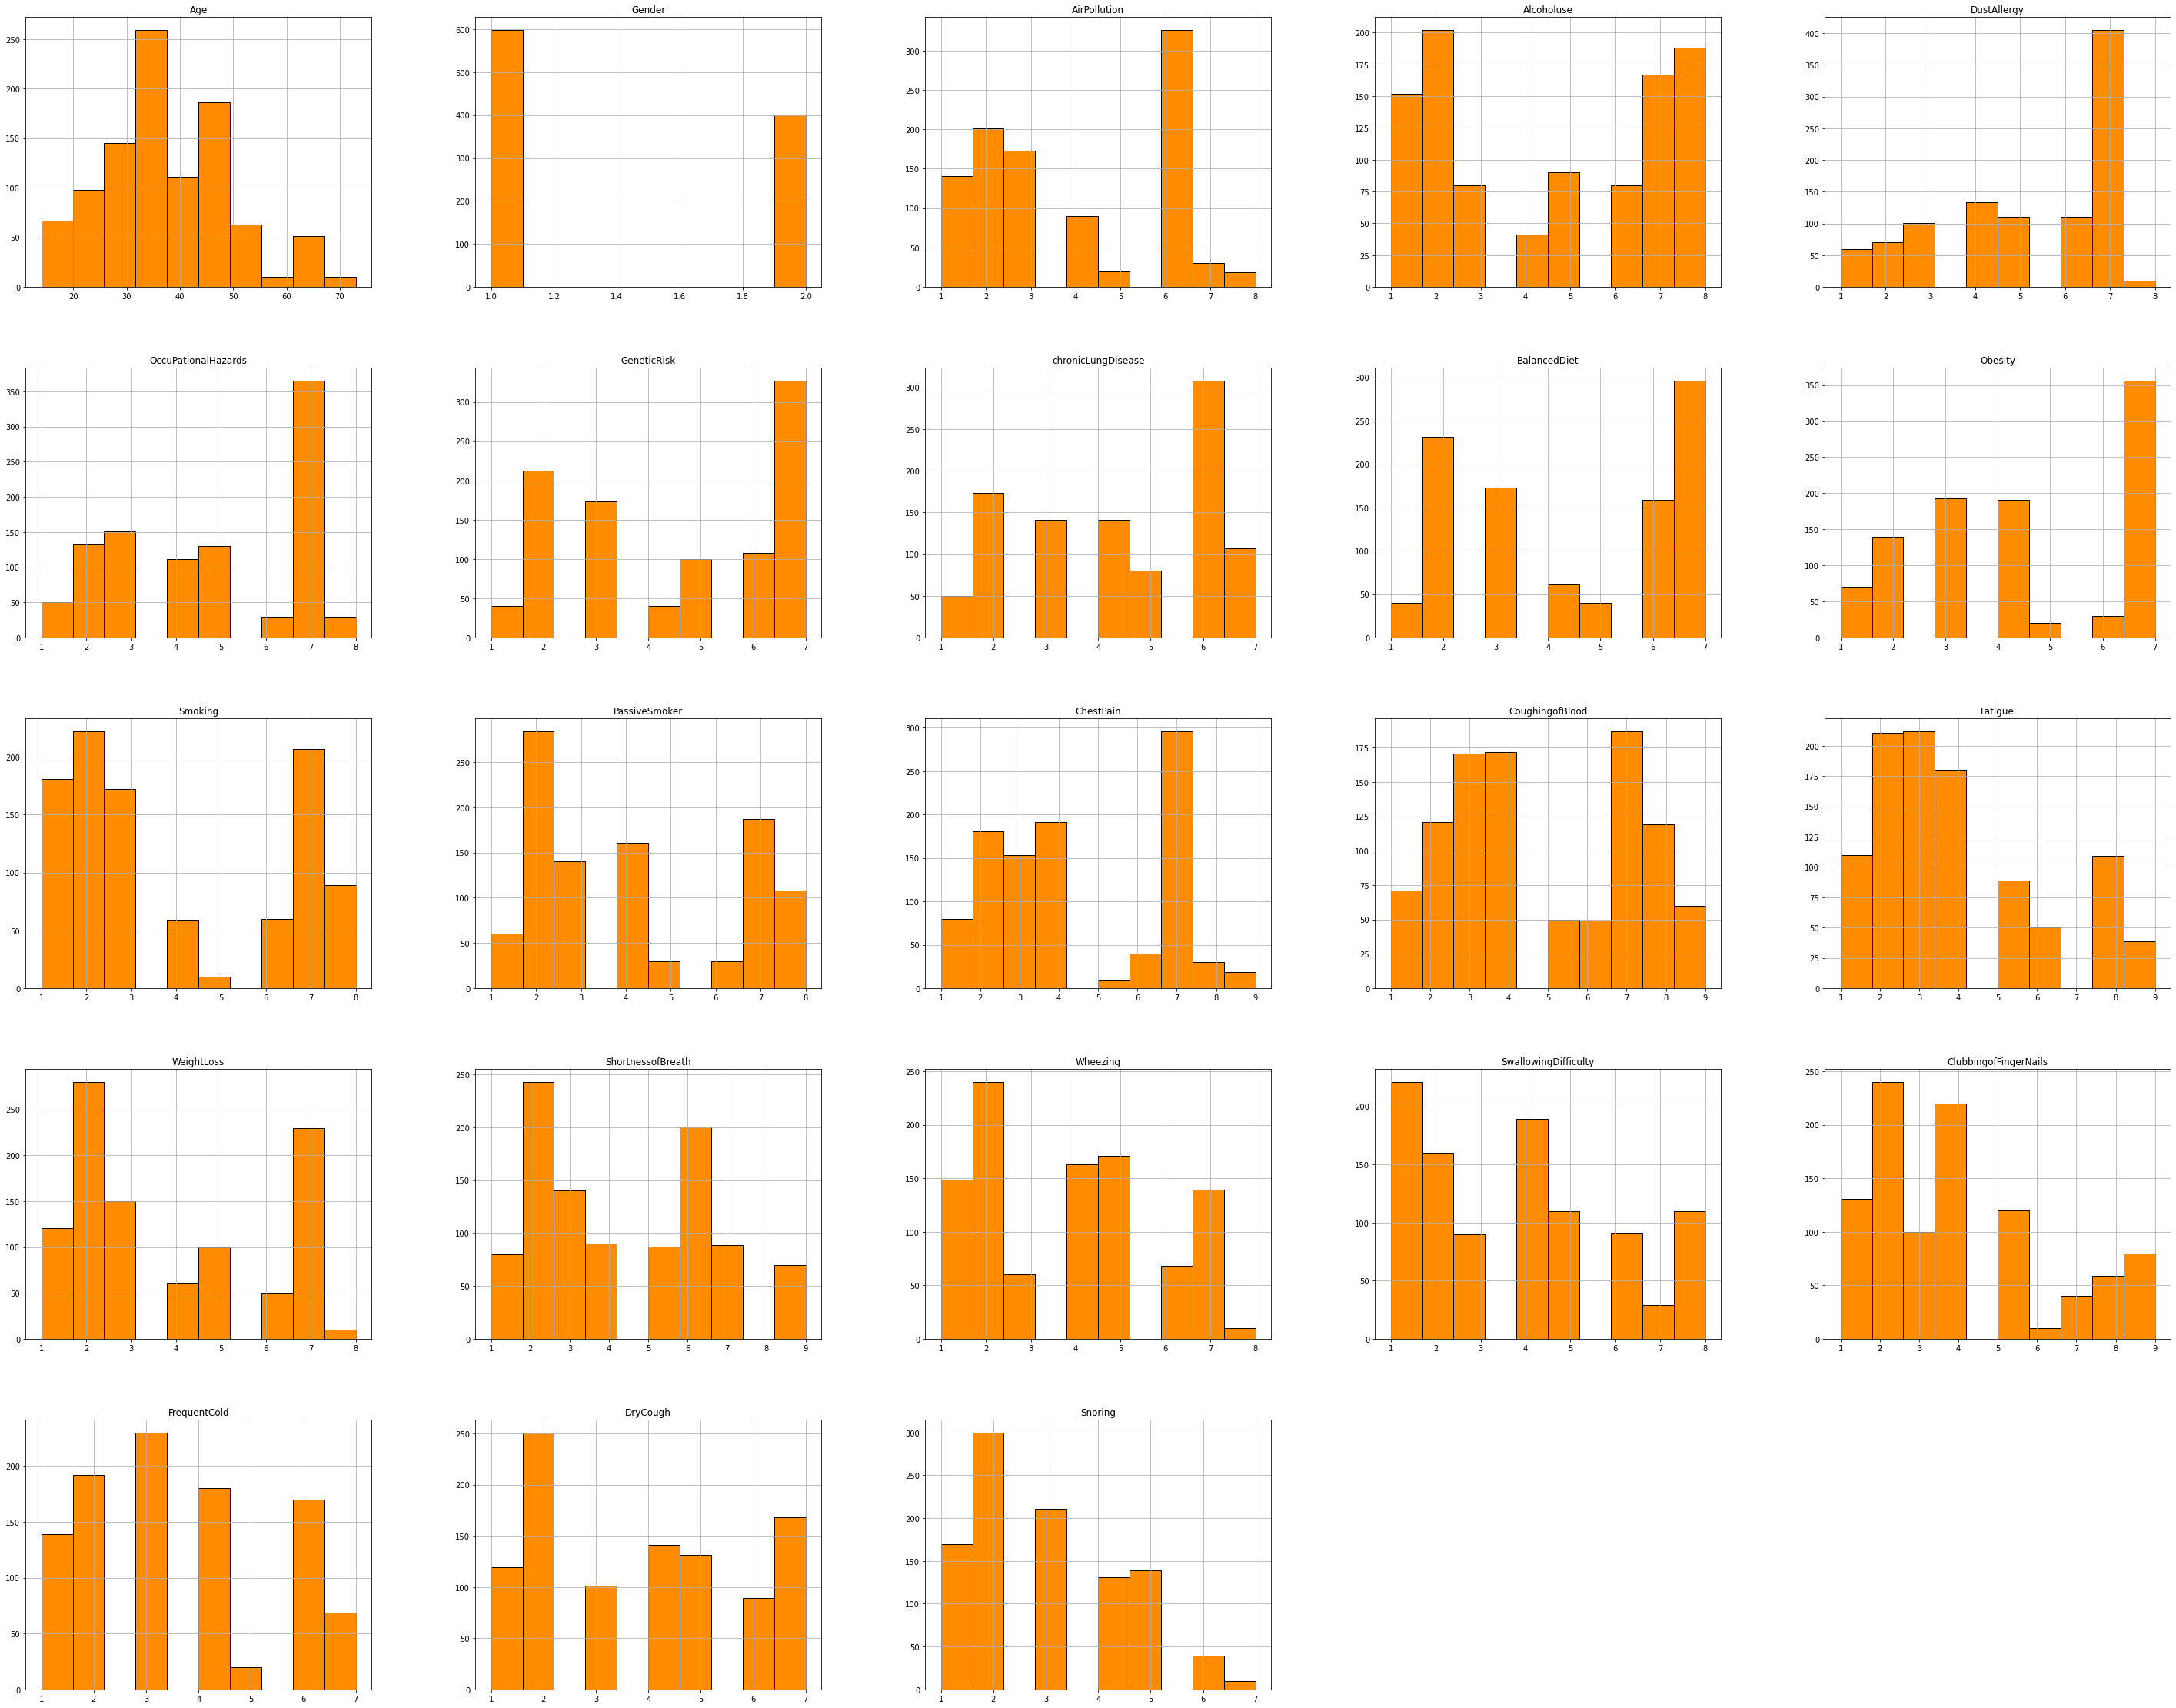

In [ ]:
df.hist(figsize = (50,40),color = 'darkorange',edgecolor = 'black');

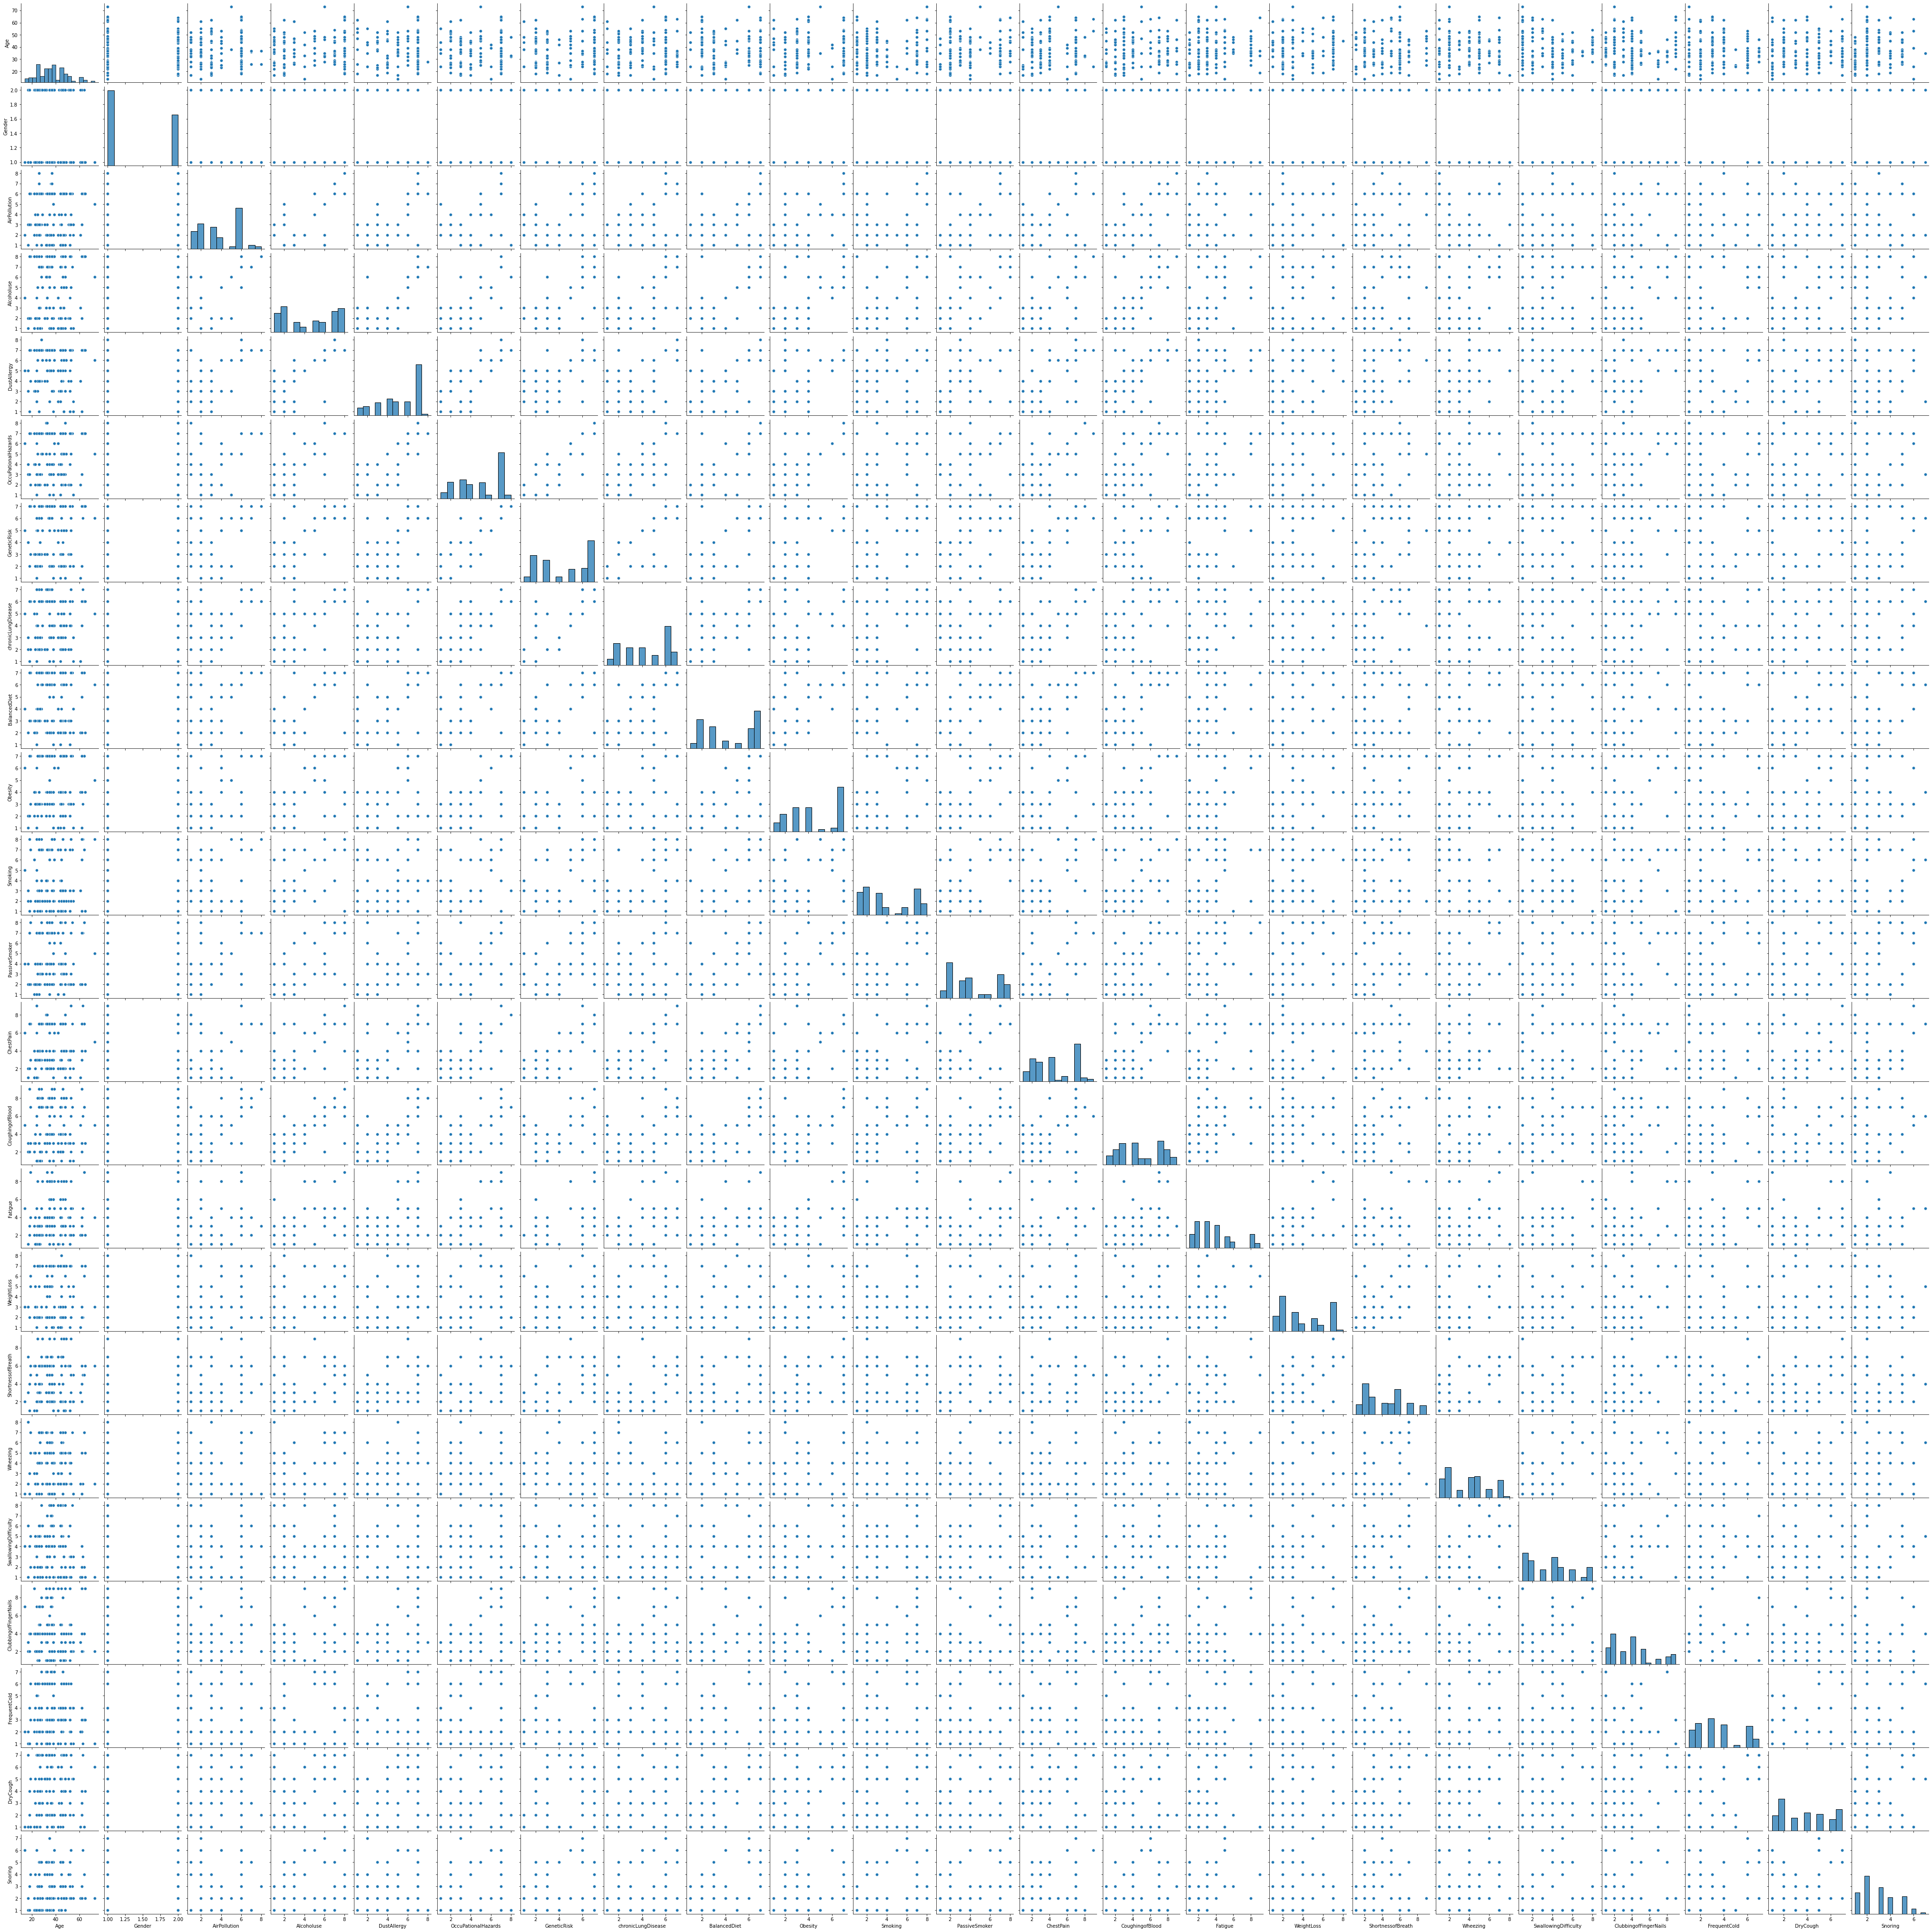

In [ ]:
sns.pairplot(df)

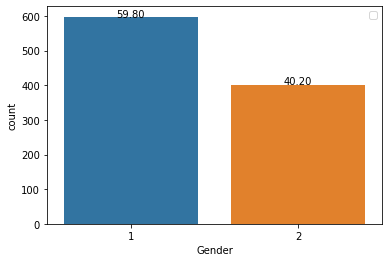

In [ ]:
total = float(df.shape[0])
ploting = sns.countplot(x='Gender', data=df)
for p in ploting.patches:
    height = p.get_height()
    ploting.text(p.get_x() + p.get_width()/2.,
           height,
           '{:.2f}'.format((height/total)*100),
           ha='center')
plt.legend()
plt.show()

In [ ]:
df['Level'] = df['Level'].map({'Low':0,'Medium':1, 'High': 2})

In [ ]:
df.head()

,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,...,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,0
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,1
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,2
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,2
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,2


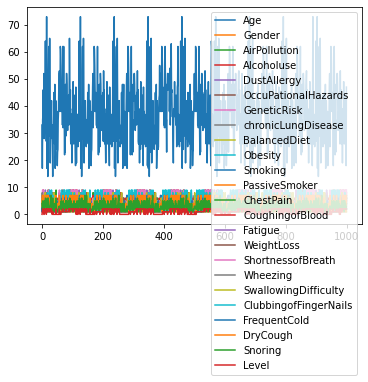

In [ ]:
df.plot()

In [ ]:
df.columns


Index(['Age', 'Gender', 'AirPollution', 'Alcoholuse', 'DustAllergy',
       'OccuPationalHazards', 'GeneticRisk', 'chronicLungDisease',
       'BalancedDiet', 'Obesity', 'Smoking', 'PassiveSmoker', 'ChestPain',
       'CoughingofBlood', 'Fatigue', 'WeightLoss', 'ShortnessofBreath',
       'Wheezing', 'SwallowingDifficulty', 'ClubbingofFingerNails',
       'FrequentCold', 'DryCough', 'Snoring', 'Level'],
      dtype='object')

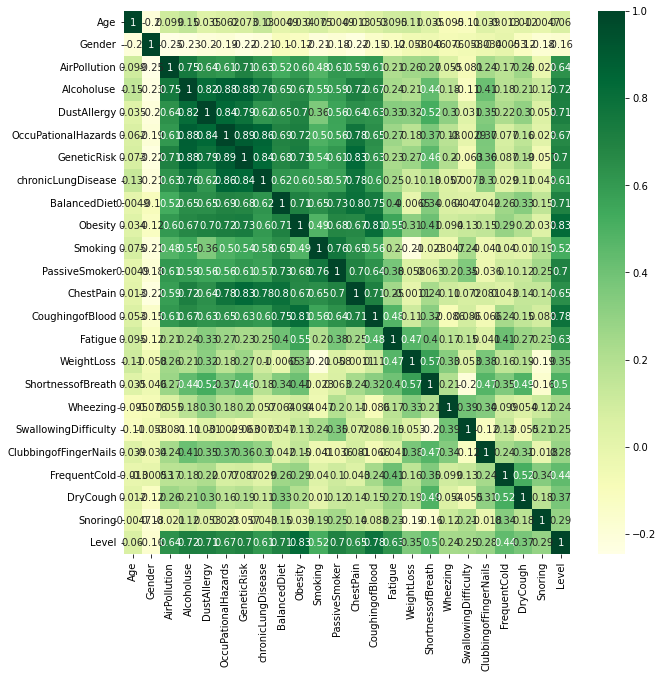

In [ ]:
corr = df.corr()
features = corr.index
plt.figure(figsize=(10,10))
ax = sns.heatmap(df[features].corr(), annot=True, cmap='YlGn')

In [ ]:
X = df.iloc[:,:-1]
y = df['Level']

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
df.dtypes

Age                      int64
Gender                   int64
AirPollution             int64
Alcoholuse               int64
DustAllergy              int64
OccuPationalHazards      int64
GeneticRisk              int64
chronicLungDisease       int64
BalancedDiet             int64
Obesity                  int64
Smoking                  int64
PassiveSmoker            int64
ChestPain                int64
CoughingofBlood          int64
Fatigue                  int64
WeightLoss               int64
ShortnessofBreath        int64
Wheezing                 int64
SwallowingDifficulty     int64
ClubbingofFingerNails    int64
FrequentCold             int64
DryCough                 int64
Snoring                  int64
Level                    int64
dtype: object

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train_scaled

,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,...,CoughingofBlood,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring
0,0.372881,0.0,0.714286,0.857143,0.857143,0.857143,1.000000,1.000000,0.833333,1.000000,...,0.750,0.875,0.571429,0.750,0.714286,0.857143,0.875,1.000000,0.833333,0.166667
1,0.355932,0.0,0.428571,0.571429,0.714286,0.571429,0.833333,0.666667,0.666667,0.666667,...,0.500,0.000,0.428571,0.250,0.142857,0.428571,0.625,0.166667,0.500000,0.000000
2,0.322034,0.0,0.714286,0.857143,0.857143,0.857143,1.000000,1.000000,0.833333,1.000000,...,0.750,0.875,0.571429,0.750,0.714286,0.857143,0.875,1.000000,0.833333,0.166667
3,0.423729,1.0,0.714286,1.000000,0.857143,0.857143,1.000000,0.833333,1.000000,1.000000,...,1.000,0.250,0.142857,0.375,0.000000,0.428571,0.125,0.500000,0.166667,0.333333
4,0.406780,1.0,0.285714,0.142857,0.285714,0.142857,0.333333,0.166667,0.333333,0.166667,...,0.000,0.000,0.142857,0.250,0.142857,0.571429,0.000,0.666667,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.644068,0.0,0.285714,0.142857,0.000000,0.142857,0.333333,0.666667,0.000000,0.166667,...,0.000,0.000,0.000000,0.000,0.285714,0.142857,0.250,0.166667,0.333333,0.333333
796,0.220339,1.0,0.285714,0.000000,0.428571,0.142857,0.333333,0.166667,0.333333,0.333333,...,0.125,0.125,0.142857,0.250,0.428571,0.000000,0.500,0.166667,0.833333,0.166667
797,0.355932,1.0,0.142857,0.000000,0.142857,0.000000,0.166667,0.000000,0.166667,0.333333,...,0.000,0.250,0.428571,0.500,0.000000,0.285714,0.125,0.000000,0.166667,0.166667
798,0.322034,0.0,0.714286,1.000000,0.857143,0.857143,1.000000,0.833333,1.000000,1.000000,...,0.750,1.000,0.714286,0.500,0.857143,0.142857,0.375,0.333333,0.000000,0.500000


In [ ]:
X_test_scaled = pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
X_test_scaled

,Age,Gender,AirPollution,Alcoholuse,DustAllergy,OccuPationalHazards,GeneticRisk,chronicLungDisease,BalancedDiet,Obesity,...,CoughingofBlood,Fatigue,WeightLoss,ShortnessofBreath,Wheezing,SwallowingDifficulty,ClubbingofFingerNails,FrequentCold,DryCough,Snoring
0,0.508475,0.0,0.714286,0.857143,0.857143,0.857143,1.000000,0.833333,1.000000,1.000000,...,0.750,0.500,0.285714,0.125,0.857143,1.000000,0.125,0.500000,0.666667,0.4
1,0.322034,0.0,0.142857,0.428571,0.571429,0.428571,0.333333,0.166667,0.166667,0.500000,...,0.375,0.250,0.428571,0.125,0.142857,0.285714,0.000,0.166667,0.333333,0.6
2,0.406780,1.0,0.142857,0.000000,0.571429,0.285714,0.166667,0.333333,0.166667,0.500000,...,0.375,0.625,0.857143,0.125,0.571429,1.000000,0.000,0.333333,0.166667,0.4
3,0.508475,0.0,0.714286,0.857143,0.857143,0.857143,1.000000,0.833333,1.000000,1.000000,...,0.750,0.500,0.285714,0.125,0.857143,1.000000,0.125,0.500000,0.666667,0.4
4,0.593220,0.0,0.714286,0.571429,0.714286,0.571429,0.666667,0.500000,0.833333,1.000000,...,0.875,0.875,0.857143,1.000,0.142857,0.000000,0.375,0.833333,1.000000,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.474576,0.0,0.142857,0.000000,0.142857,0.285714,0.500000,0.333333,0.166667,0.000000,...,0.125,0.000,0.000000,0.000,0.142857,0.000000,0.125,0.333333,0.000000,0.2
196,0.322034,0.0,0.285714,0.142857,0.428571,0.142857,0.333333,0.166667,0.333333,0.333333,...,0.250,0.375,0.571429,0.625,0.571429,0.571429,0.375,0.833333,0.666667,0.6
197,0.389831,0.0,0.000000,0.142857,0.285714,0.428571,0.166667,0.500000,0.333333,0.333333,...,0.375,0.375,0.000000,0.125,0.428571,0.714286,0.500,0.500000,0.166667,0.8
198,0.186441,1.0,0.428571,0.571429,0.714286,0.571429,0.666667,0.500000,0.833333,1.000000,...,0.875,0.875,0.857143,1.000,0.142857,0.000000,0.375,0.833333,1.000000,0.2


In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
prediction = model.predict(X_test)
prediction

array([2, 0, 1, 2, 2, 1, 0, 1, 1, 2, 2, 0, 2, 0, 0, 1, 2, 1, 1, 0, 2, 0,
       0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 1, 0, 1,
       0, 2, 0, 2, 2, 0, 0, 2, 1, 2, 1, 1, 2, 1, 1, 0, 0, 2, 1, 0, 0, 2,
       1, 2, 2, 2, 2, 1, 1, 1, 0, 2, 0, 1, 1, 0, 2, 2, 2, 1, 1, 0, 2, 2,
       1, 1, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 0, 1, 2, 0, 1, 1, 0, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 2, 0, 2, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 1,
       0, 0, 1, 0, 1, 1, 2, 0, 2, 0, 1, 2, 1, 2, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 2, 1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 2, 2, 1, 2, 0, 0,
       2, 2, 1, 1, 1, 1, 0, 1, 2, 1, 0, 2, 2, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       2, 1])

In [ ]:
accuracy = metrics.accuracy_score(y_test,prediction)
accuracy


1.0

Score :  1.0


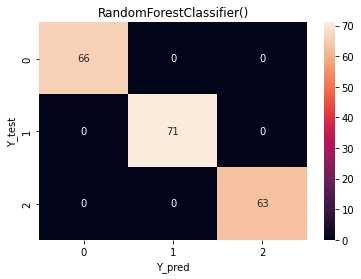

In [ ]:
from sklearn.metrics import confusion_matrix
pred_list = [model]

for i in pred_list:
    print("Score : ",i.score(X_test,y_test))
    y_pred = i.predict(X_test)
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True)
    plt.xlabel("Y_pred")
    plt.ylabel("Y_test")
    plt.title(i)
    plt.show()

In [ ]:
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_prediction =  LR.predict(X_test)
y_prediction

array([ 1.94846951,  0.40282517,  0.88505661,  1.94846951,  1.95107334,
        1.3576151 ,  0.00502342,  0.77444408,  1.08284136,  1.91137405,
        2.05226494,  0.14298104,  1.94846951,  0.06333701, -0.04182811,
        0.90197702,  1.8271307 ,  1.03634366,  1.03211804,  0.232678  ,
        2.11406725,  0.00502342,  0.31685693,  1.13664205,  2.00182772,
        1.80109858,  1.89544103, -0.09745407,  2.00182772,  1.80109858,
        1.89283813,  0.94797425, -0.09745407,  1.89544103,  1.89283813,
        2.06070904,  0.01030878,  2.04553765,  0.94797425,  0.25142351,
        0.0854696 ,  1.03944124, -0.41149474,  0.91336607, -0.11273855,
        1.94846951,  0.10563343,  2.00182772,  1.5619751 , -0.0423945 ,
        0.40282517,  2.11406725,  1.01356556,  2.3664773 ,  1.05571131,
        0.89058797,  1.92243739,  0.78908714,  0.89058797,  0.40282517,
       -0.11273855,  1.93839433,  0.77444408,  0.25661858, -0.04182811,
        1.91137405,  0.96734781,  1.66939883,  2.04553765,  1.97

In [ ]:
score=r2_score(y_test,y_prediction)

In [ ]:
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 100.00
